In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd /content/gdrive/My Drive/Task  #Change Directory according to your system

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Task #Change Directory according to your system'
/content/gdrive/My Drive/Task


Import necessary libraries

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Import Data

In [6]:
# Load data from csv file
dataset = pd.read_csv('ModelData.csv')
dataset = pd.DataFrame(dataset)
dataset.head(10)


,RMS,CC,F0,F1,Class
0,2.1159,0.9834,3.116531,0.176920,0
1,1.8772,0.9733,2.212684,2.392617,0
2,1.9290,0.9822,2.338491,2.575447,0
3,1.8216,0.9777,2.555161,2.578739,0
4,1.6639,0.9715,2.010262,2.036390,0
5,0.1677,0.4323,0.218718,0.013475,1
6,3.0635,0.9528,3.492780,3.773862,1
7,2.0692,0.9781,2.835503,2.953903,1
8,2.1089,0.9816,2.378931,2.661001,1
9,1.8292,0.9464,2.233631,2.253951,1


In [7]:
dataset.isnull().sum()  # To remove null values from data

RMS      0
CC       0
F0       0
F1       0
Class    0
dtype: int64

In [8]:
dataset.shape

(55, 5)

Data Augmentation

In [9]:
dataset = dataset.append(dataset, ignore_index = True) # Increase the size of training data because original data is not enough to train a model.
dataset = dataset.append(dataset, ignore_index = True)
dataset = dataset.append(dataset, ignore_index = True)


In [10]:
dataset.shape

(440, 5)

Data Skewness

In [11]:
dataset.skew() #Check data-skewness to decide a better model to fit.

RMS     -1.044684
CC      -1.603310
F0      -0.699254
F1      -0.695604
Class    0.000000
dtype: float64

Data Distribution for Understanding Data 

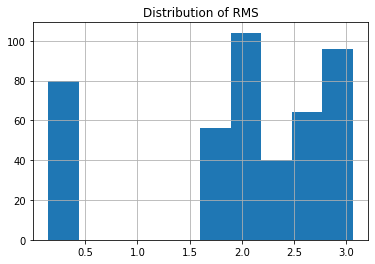

In [12]:
dataset.RMS.hist() # Distribution of RMS value in Data
plt.title('Distribution of RMS');

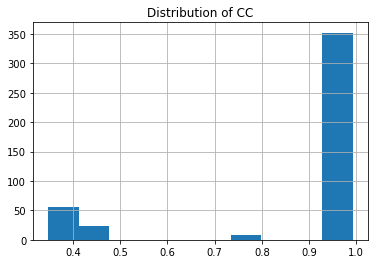

In [13]:
dataset.CC.hist()
plt.title('Distribution of CC');

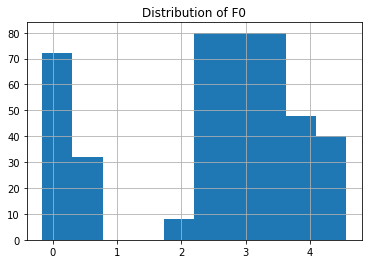

In [14]:
dataset.F0.hist()
plt.title('Distribution of F0');

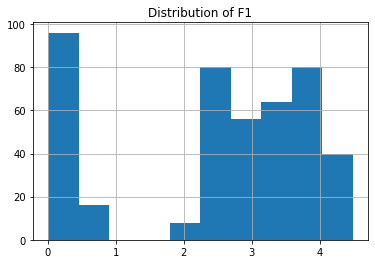

In [15]:
dataset.F1.hist()
plt.title('Distribution of F1');

Random Shuffle of Data

In [16]:
from sklearn.utils import shuffle

shuffled = shuffle(dataset, random_state=42)  #Shuffle data randomly to train values of all classes
shuffled.head(10)

,RMS,CC,F0,F1,Class
265,2.3757,0.9855,3.140776,3.170726,9
78,0.1659,0.3805,0.080636,0.186513,4
347,0.1672,0.4122,0.096062,0.264574,3
255,2.9706,0.9902,4.352784,4.271039,7
327,2.2688,0.9840,2.234984,2.536233,10
291,2.7593,0.9863,3.166476,3.353774,3
184,2.6608,0.9569,3.442073,3.494684,3
82,2.1873,0.9828,2.929886,3.060754,5
438,2.4968,0.9877,3.125056,3.367413,10
405,2.3414,0.9839,2.681197,2.880875,4


Data Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(shuffled.iloc[:,:4], shuffled.Class ,test_size = 0.30, random_state = 42)

In [18]:
X_train

,RMS,CC,F0,F1
110,2.1159,0.9834,3.116531,0.176920
60,0.1677,0.4323,0.218718,0.013475
293,2.7732,0.9878,3.613112,3.784175
333,1.8216,0.9777,2.555161,2.578739
392,2.0692,0.9781,2.835503,2.953903
...,...,...,...,...
417,2.0692,0.9794,2.446998,2.645486
115,0.1677,0.4323,0.218718,0.013475
380,3.0302,0.9787,4.132689,4.170590
106,1.9875,0.9818,2.427937,2.577279


Model Fitting

In [19]:
model = tree.DecisionTreeClassifier(random_state= 42)   # Decision_tree Algorithm
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9772727272727273

In [20]:
model.score(X_test,y_test)

0.9772727272727273

In [21]:
# Make predictions on the test set
y_pred =model.predict(X_test)

Model Accuracy

In [22]:
# Evaluate the performance of the model using accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.9772727272727273
Precision:  0.9821428571428571
Recall:  0.9772727272727273
F1 score:  0.9771541501976284


Confusion Matrix

/bin/bash: matplotlib: command not found


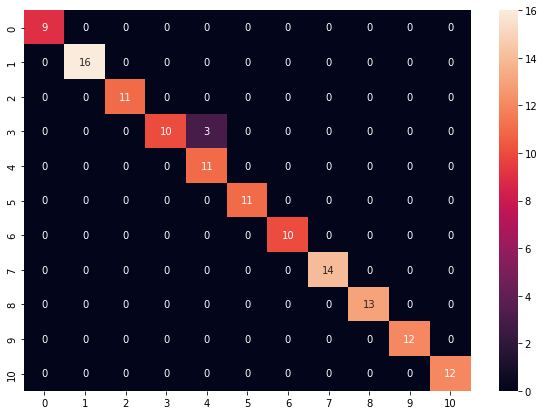

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
!matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel = ('Predicted')
plt.ylabel = ('Truth')